## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Loading Data

In [2]:
df=pd.read_csv("C:/Users/Suruchi/Desktop/folder_aplications/files/CSV Files/customer_shopping_data.csv")

In [3]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21-09-2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22-09-2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28-03-2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16-03-2021,Istinye Park


## Data Preprocessing for EDA

In [4]:
df.shape

(99457, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [6]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [7]:
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

## To check whether any person done shopping multiple times

In [8]:
df[df['customer_id'].duplicated()]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


##  Who Shops the Most (Male / Female) ?

In [9]:
gnd=df['gender'].value_counts()
gnd

Female    59482
Male      39975
Name: gender, dtype: int64

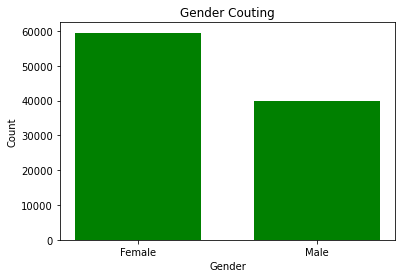

In [10]:
plt.bar(gnd.index,gnd.values,color="green",width=0.7)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Couting")
plt.show()

## Payment Mode distribution

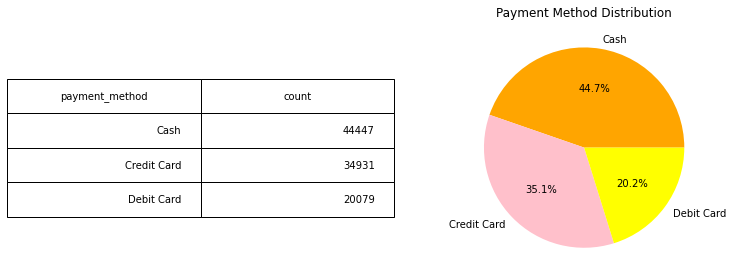

In [11]:
paym=df['payment_method'].value_counts()
# Creating a sample DataFrame
data = {'payment_method': paym.index,'count':paym.values}
this=pd.DataFrame(data)

# Creating subplots with one row and two columns
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(11,4))
# Plotting the DataFrame as a table
ax1.axis('off')  # Hide axis
tb=ax1.table(cellText=this.values, colLabels=this.columns, loc='center')
tb.scale(1, 2.5)
tb.set_fontsize(10)

# Plotting the bar graph
ax2.pie(this['count'],labels=this['payment_method'],colors=["Orange","pink","yellow"],autopct='%1.1f%%')
ax2.set_title('Payment Method Distribution')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## Relationship between Category and Gender Shopping

gender,Female,Male
category,,
Books,2906,2075
Clothing,20652,13835
Cosmetics,9070,6027
Food & Beverage,8804,5972
Shoes,5967,4067
Souvenir,3017,1982
Technology,2981,2015
Toys,6085,4002


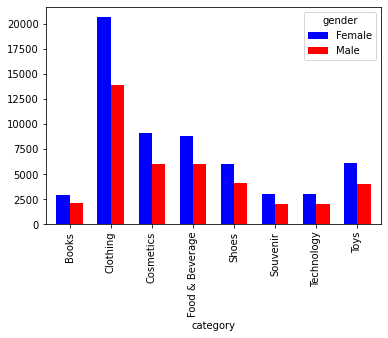

In [12]:
c=df.groupby("gender")["category"].value_counts().unstack(level=0)
c.plot(kind="bar",color=["blue","red"],width=0.65)
c

### Which Age Range shops the most??

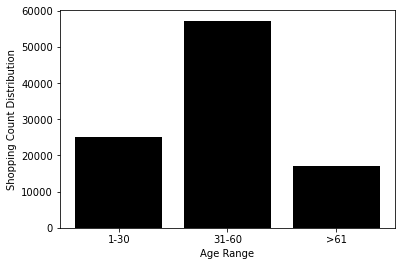

In [13]:
one_thirty=[]
thirty_sixty=[]
more=[]
for i in df["age"]:
    if (i in range(1,31)):
        one_thirty.append(i)
    elif (i in range(31,61)):
        thirty_sixty.append(i)
    else:
        more.append(i)
plt.bar(["1-30","31-60",">61"],[len(one_thirty),len(thirty_sixty),len(more)],color="black")
plt.xlabel("Age Range")
plt.ylabel("Shopping Count Distribution")
plt.show()

### Relationship between Age Range,Gender and Shopping Count

In [14]:
def categorize_age(age):
    if age <= 30:
        return '1-30'
    elif age <= 60:
        return '31-60'
    else:
        return '>60'
df['age_dist']=df['age'].apply(categorize_age)

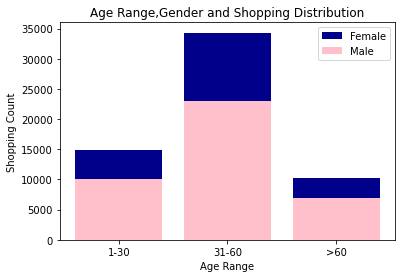

In [15]:
age_gen=df.groupby('age_dist')["gender"].value_counts().sort_index(level='age_dist').unstack()
age_gen
plt.bar(age_gen.index,age_gen['Female'],label="Female",color="darkblue")
plt.bar(age_gen.index,age_gen['Male'],label="Male",color="pink")

plt.xlabel("Age Range")
plt.ylabel("Shopping Count")
plt.title("Age Range,Gender and Shopping Distribution")
plt.legend()
plt.show()

### Which Shopping Mall Has Earned maximum?!

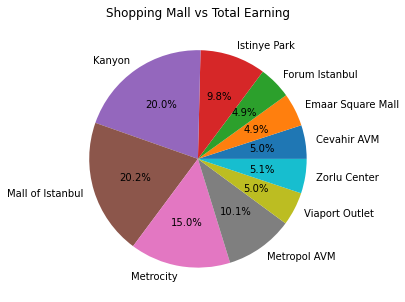

In [16]:
mallprice=df.groupby('shopping_mall')['price'].sum().reset_index()
plt.figure(figsize=(5,5))
plt.pie(mallprice['price'],labels=mallprice['shopping_mall'],autopct="%1.01f%%")

plt.title('Shopping Mall vs Total Earning')
plt.show()


### Shopping Mall VS Payment Mode

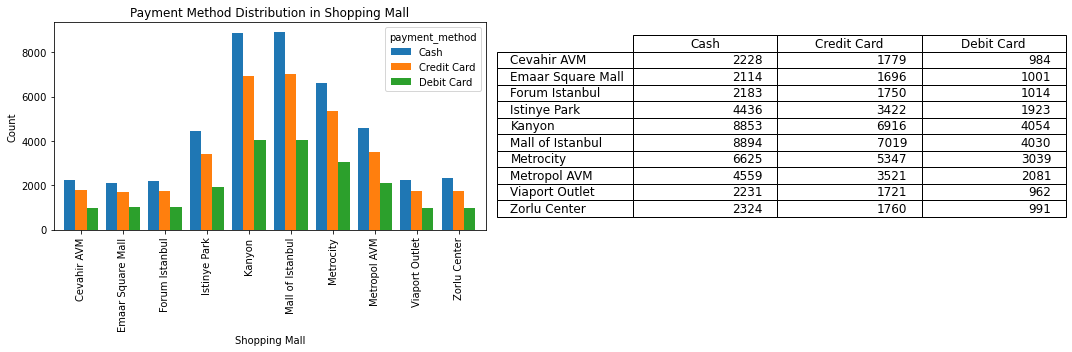

In [17]:
n = df.groupby('shopping_mall')['payment_method'].value_counts().unstack()
fig, axs = plt.subplots(1, 2, figsize=(15,5))
n_plot = n.plot(kind="bar", width=0.8, ax=axs[0])

# Adjusting the subplot properties
axs[0].set_xlabel('Shopping Mall')
axs[0].set_ylabel('Count')
axs[0].set_title('Payment Method Distribution in Shopping Mall')

axs[1].axis('off')
table = axs[1].table(cellText=n.values, colLabels=n.columns,rowLabels=n.index,loc='center')
table.set_fontsize(12)          # Setting the font size for the table cells
table.scale(1,1.8)

plt.tight_layout()
plt.show()